In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import sys
sys.path.append("/home/hma000/accomatic-web/accomatic/")
from NcReader import read_geotop, read_snow
pth = '/home/hma000/accomatic-web/snow/dat/'


In [18]:
gst = read_geotop(file_path='/home/hma000/accomatic-web/data/nc/mod_stephan_recco.nc', sitename='YK16-RH02')
gst.index = gst.index.droplevel('sitename')
gst.index = pd.to_datetime(gst.index)
mask = (gst.index >= pd.to_datetime("01/09/2015", dayfirst=True)) & (gst.index <= pd.to_datetime("30/08/2021", dayfirst=True))


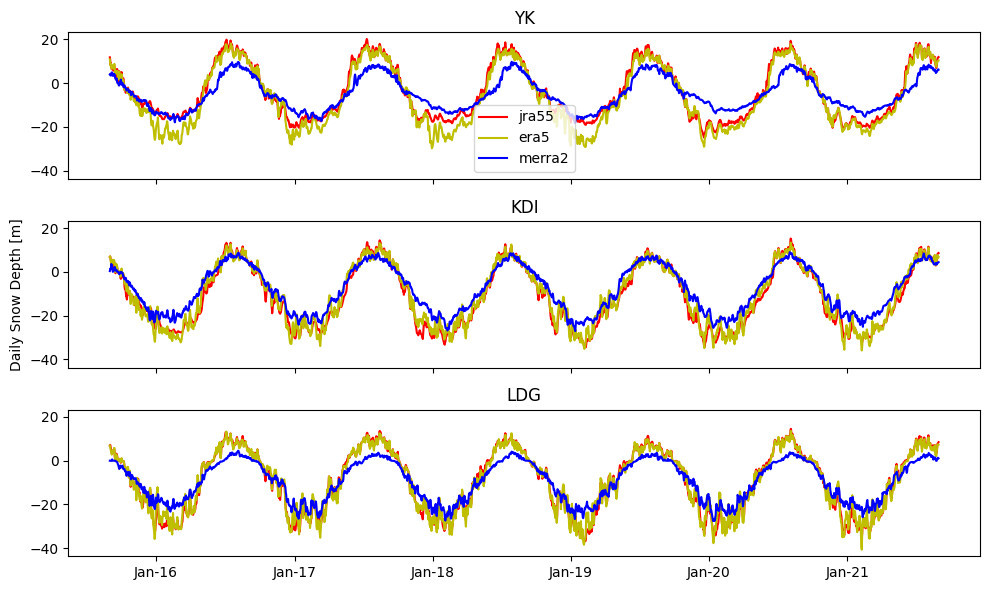

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6), sharey=True)

i = 0
for place, sitename in zip(['yk','kdi','ldg'],['YK16-RH02','NGO-DD-1009','KDI-W-Ttop']):
    gst = read_geotop(file_path='/home/hma000/accomatic-web/data/nc/mod_stephan_recco.nc', sitename=sitename)
    gst = gst.droplevel('sitename')
    gst.index = pd.to_datetime(gst.index)
    for reanalysis, c in zip(['jra55','era5','merra2'], ['r','y','b']):
        
        ax[i].plot(gst[mask][reanalysis], label=reanalysis, c=c)
        ax[i].set_title(place.upper())
        if i < 2:
            ax[i].tick_params(labelbottom=False)    
    i = i + 1
    
ax[0].legend()
ax[1].set_ylabel("Daily Snow Depth [m]")
ax[2].xaxis.set_major_formatter(md.DateFormatter('%b-%y'))
plt.tight_layout()

# Snow depth at YKL clusters: 2015-2017

/home/hma000/.conda/envs/acco/lib/python3.9/site-packages/xarray/coding/times.py:153: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/home/hma000/.conda/envs/acco/lib/python3.9/site-packages/xarray/coding/times.py:153: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/home/hma000/.conda/envs/acco/lib/python3.9/site-packages/xarray/coding/times.py:153: Serial

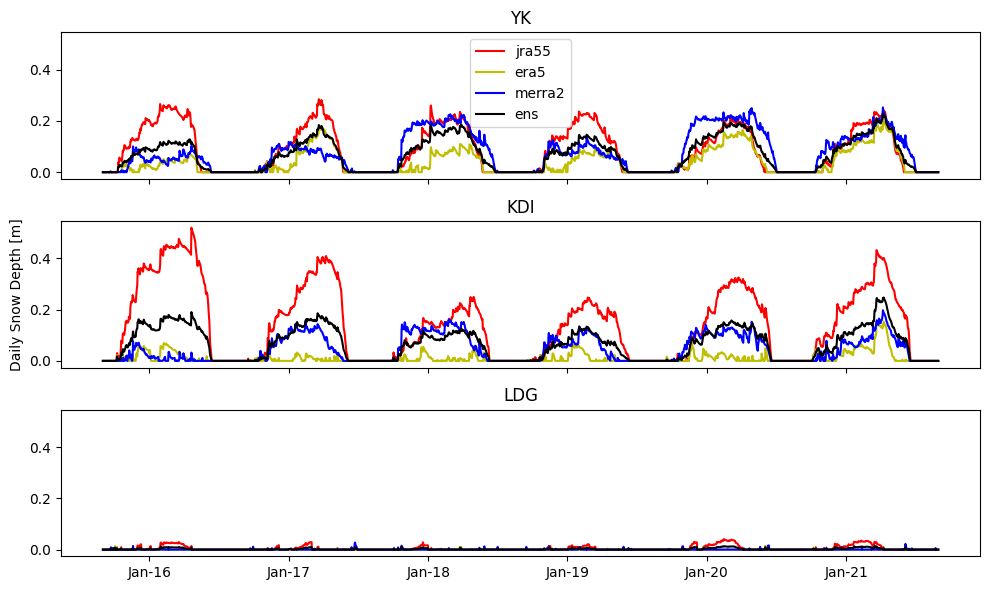

In [41]:

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6), sharey=True)

i = 0
for place, sitename in zip(['yk','kdi','ldg'],['YK16-RH02','KDI-E-Wet','NGO-DD-1009']):
    gst = read_snow(file_path='/home/hma000/accomatic-web/snow/dat/result_snow_depth.nc', sitename=sitename)
    gst = gst.droplevel('sitename')
    gst.index = pd.to_datetime(gst.index)
    for reanalysis, c in zip(['jra55','era5','merra2', 'ens'], ['r','y','b', 'k']):
        
        ax[i].plot(gst[mask][reanalysis] / 1000, label=reanalysis, c=c)
        ax[i].set_title(place.upper())
        if i < 2:
            ax[i].tick_params(labelbottom=False)    
    i = i + 1
    
ax[0].legend()
ax[1].set_ylabel("Daily Snow Depth [m]")
ax[2].xaxis.set_major_formatter(md.DateFormatter('%b-%y'))
plt.tight_layout()


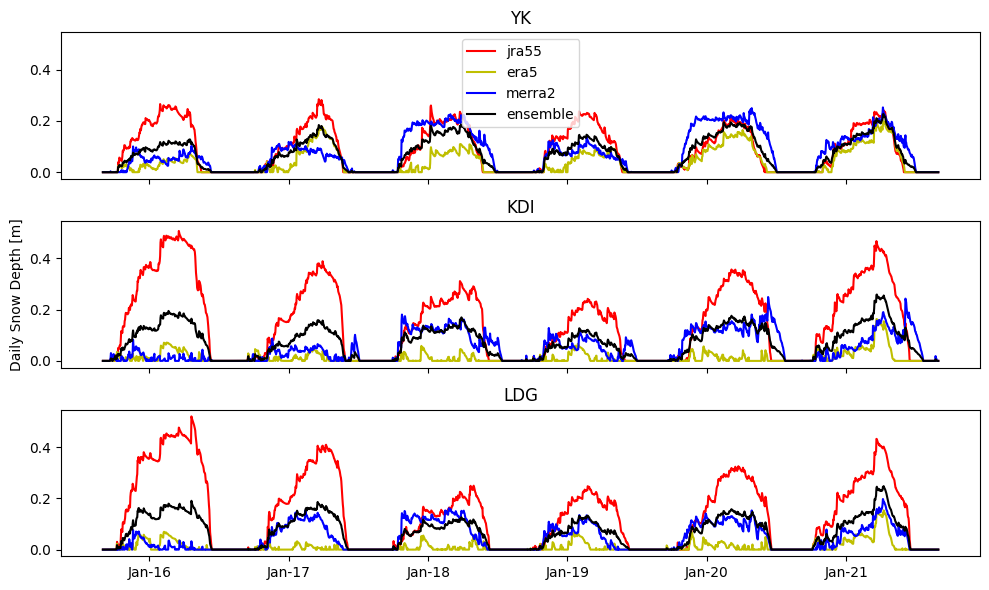

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6), sharey=True)

i = 0
for place in ['yk','kdi','ldg']:
    ens_list = []
    for reanalysis, c in zip(['jra55','era5','merra2'], ['r','y','b']):
        snow = pd.read_csv(f'{pth}/snowdepth/{place}_{reanalysis}.txt', usecols=["Date12[DDMMYYYYhhmm]", "snow_depth[mm]"], index_col=0, parse_dates=True, dayfirst=True)       
        mask = (snow.index >= pd.to_datetime("01/09/2015", dayfirst=True)) & (snow.index <= pd.to_datetime("30/08/2021", dayfirst=True))
        ens_list.append(snow[mask] / 1000)
        ax[i].plot(snow[mask] / 1000, label=reanalysis, c=c)
        ax[i].set_title(place.upper())
        if i < 2:
            ax[i].tick_params(labelbottom=False)    
    ens = pd.concat(ens_list, axis=1)
    ax[i].plot(ens.mean(axis=1), label='ensemble', c='k')
    i = i + 1
    
ax[0].legend()
ax[1].set_ylabel("Daily Snow Depth [m]")
ax[2].xaxis.set_major_formatter(md.DateFormatter('%b-%y'))
plt.tight_layout()



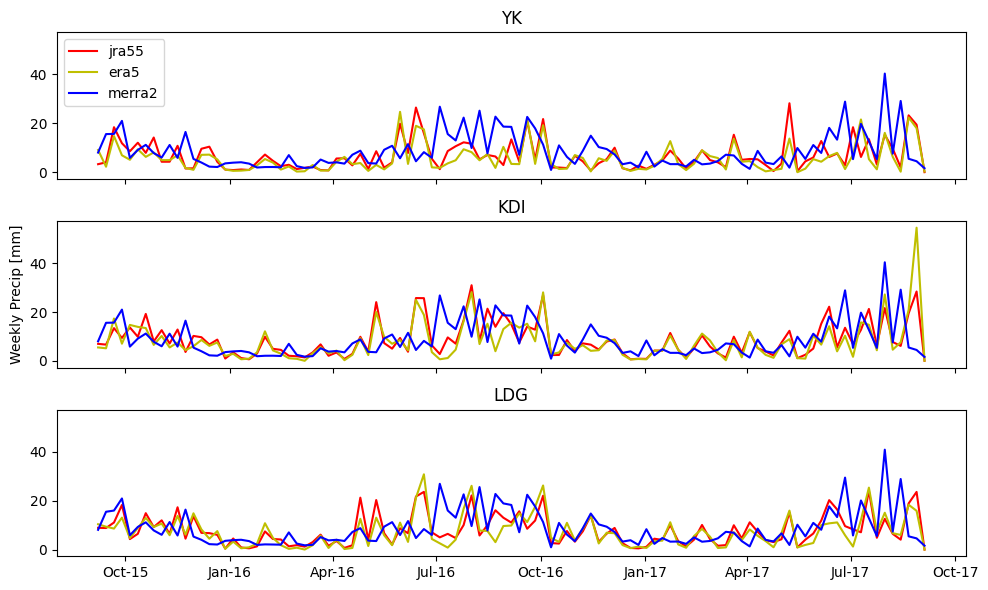

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6), sharey=True)

i = 0
for place in ['yk','kdi','ldg']:
    for reanalysis, c in zip(['jra55','era5','merra2'], ['r','y','b']):
        df = pd.read_csv(f'{pth}/forcing/{place}_{reanalysis}.txt', usecols=["Date", "IPrec"], index_col=0, parse_dates=True, dayfirst=True)      
        df.index = pd.to_datetime(df.index)

        df = df.resample('W-Mon').sum()

        mask = (df.index >= pd.to_datetime("01/09/2015", dayfirst=True)) & (df.index <= pd.to_datetime("30/08/2021", dayfirst=True))
        ax[i].plot(df[mask], label=reanalysis, c=c)
        ax[i].set_title(place.upper())
        if i < 2:
            ax[i].tick_params(labelbottom=False)    

    i = i + 1
    
ax[0].legend()
ax[1].set_ylabel("Weekly Precip [mm]")
ax[2].xaxis.set_major_formatter(md.DateFormatter('%b-%y'))
plt.tight_layout()




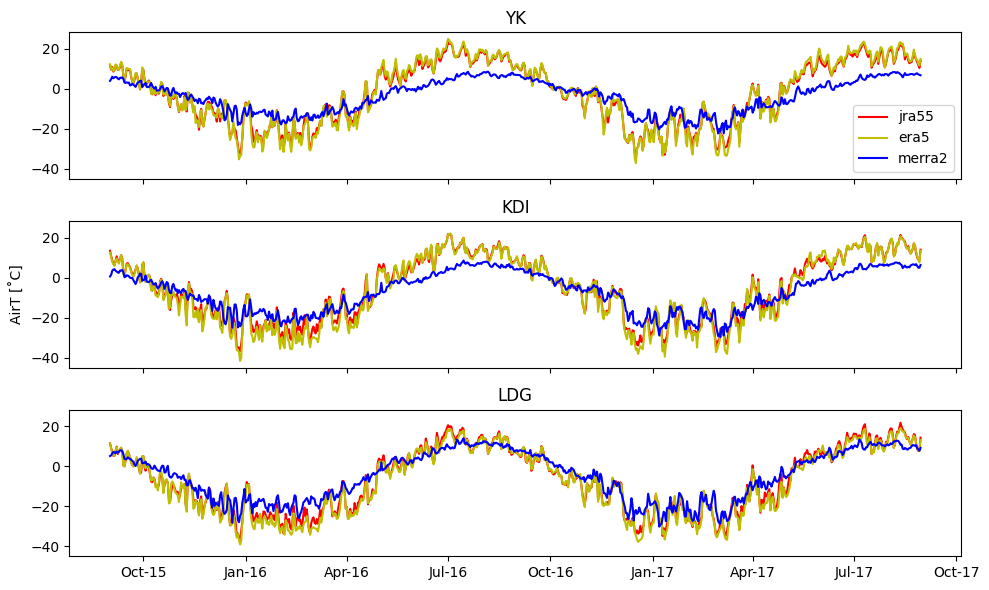

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6), sharey=True)

i = 0
for place in ['yk','kdi','ldg']:
    for reanalysis, c in zip(['jra55','era5','merra2'], ['r','y','b']):
        df = pd.read_csv(f'{pth}/forcing/{place}_{reanalysis}.txt', usecols=["Date", "AirTemp"], index_col=0, parse_dates=True, dayfirst=True)      
        df.index = pd.to_datetime(df.index)

        df = df.resample('D').mean()

        mask = (df.index >= pd.to_datetime("01/09/2015", dayfirst=True)) & (df.index <= pd.to_datetime("30/08/2021", dayfirst=True))
        ax[i].plot(df[mask], label=reanalysis, c=c)
        ax[i].set_title(place.upper())
        if i < 2:
            ax[i].tick_params(labelbottom=False)    

    i = i + 1
    
ax[0].legend()
ax[1].set_ylabel("AirT [˚C]")
ax[2].xaxis.set_major_formatter(md.DateFormatter('%b-%y'))
plt.tight_layout()

# Plot SWE for a bad site.

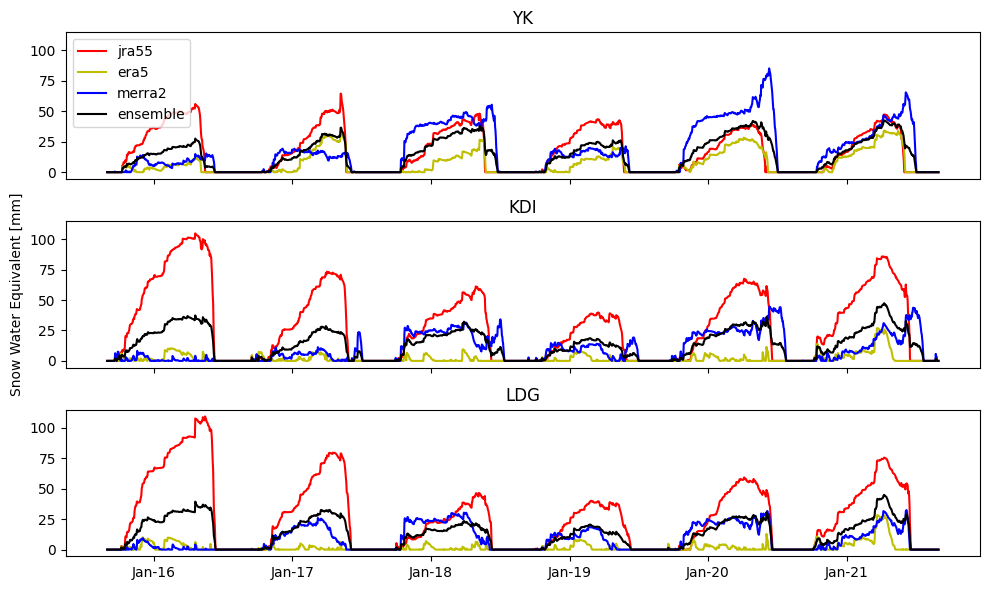

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,6), sharey=True)

i = 0
for place in ['yk','kdi','ldg']:
    ens_list = []
    for reanalysis, c in zip(['jra55','era5','merra2'], ['r','y','b']):
        swe = pd.read_csv(f'{pth}/snowdepth/{place}_{reanalysis}.txt', usecols=["Date12[DDMMYYYYhhmm]", "snow_water_equivalent[mm]"], index_col=0, parse_dates=True, dayfirst=True)       
        mask = (swe.index >= pd.to_datetime("01/09/2015", dayfirst=True)) & (swe.index <= pd.to_datetime("30/08/2021", dayfirst=True))
        ens_list.append(swe[mask] / 1000)
        ax[i].plot(swe[mask] / 1000, label=reanalysis, c=c)
        ax[i].set_title(place.upper())
        if i < 2:
            ax[i].tick_params(labelbottom=False)
    ens = pd.concat(ens_list, axis=1)
    print(ens.mean(axis=1).head())
    ax[i].plot(ens.mean(axis=1), label='ensemble', c='k')
    i = i + 1
    
ax[0].legend()
ax[1].set_ylabel("Snow Water Equivalent [mm]")
ax[2].xaxis.set_major_formatter(md.DateFormatter('%b-%y'))
plt.tight_layout()

